In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [11]:
with open ('Expanded_data_with_more_features.csv') as file :
  df=pd.read_csv(file)
df = df.drop('Unnamed: 0', axis=1)

df.head(10)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
5,female,group B,associate's degree,standard,none,married,regularly,yes,1.0,school_bus,5 - 10,73,84,79
6,female,group B,some college,standard,completed,widowed,never,no,1.0,private,5 - 10,85,93,89
7,male,group B,some college,free/reduced,none,married,sometimes,yes,1.0,private,> 10,41,43,39
8,male,group D,high school,free/reduced,completed,single,sometimes,no,3.0,private,> 10,65,64,68
9,female,group B,high school,free/reduced,none,married,regularly,yes,NaN,private,< 5,37,59,50


In [12]:
df.shape


(30641, 14)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [14]:
df.isna().sum()


Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

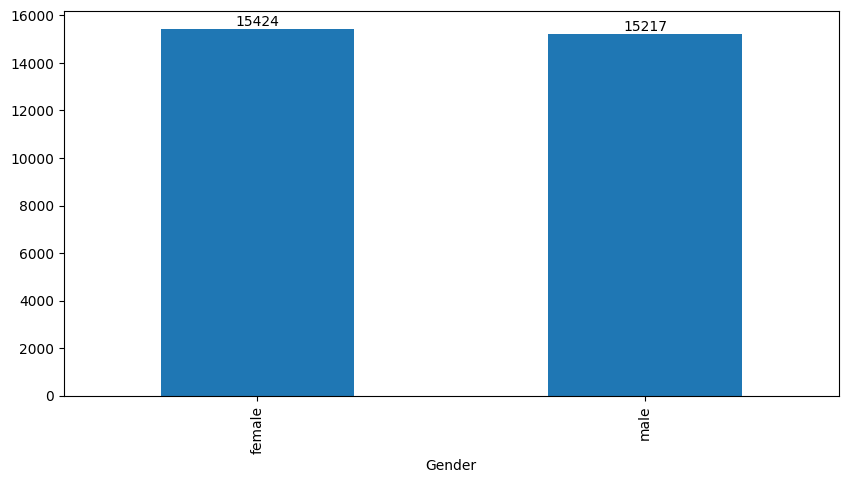

        MathScore        ReadingScore        WritingScore       
             mean median         mean median         mean median
Gender                                                          
female  64.080654   64.0    72.853216   73.0    72.856457   73.0
male    69.069856   69.0    65.854571   66.0    63.920418   64.0


In [21]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
df['Gender'].value_counts().plot(kind='bar', ax=ax)

# Annotate the count above each bar
for i, value in enumerate(df['Gender'].value_counts()):
    ax.text(i, value, str(value), ha='center', va='bottom')

plt.show()

# Display mean and median scores by gender
grouped_scores = df.groupby(['Gender'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(['mean', 'median'])
print(grouped_scores)

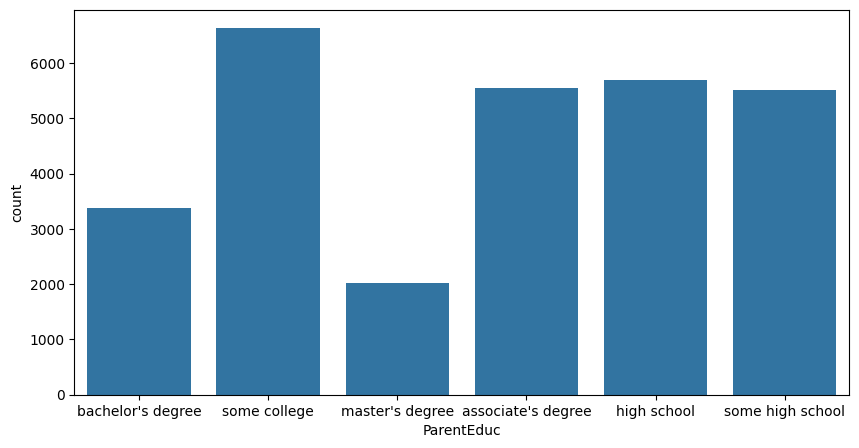

MathScore        WritingScore        ReadingScore       
                         mean median         mean median         mean median
ParentEduc                                                                  
associate's degree  68.365586   69.0    70.299099   71.0    71.124324   71.0
bachelor's degree   70.466627   71.0    73.331069   73.5    73.062020   73.0
high school         64.435731   64.0    65.421136   66.0    67.213997   67.0
master's degree     72.336134   73.0    76.356896   77.0    75.832921   77.0
some college        66.390472   66.0    68.501432   69.0    69.179708   69.0
some high school    62.584013   63.0    63.632409   64.0    65.510785   65.0

In [24]:
plt.subplots(1,1, figsize=(10,5))

sns.countplot(data=df, x='ParentEduc')


plt.show()

df.groupby(['ParentEduc'])[['MathScore','WritingScore','ReadingScore']].agg(['mean','median'])

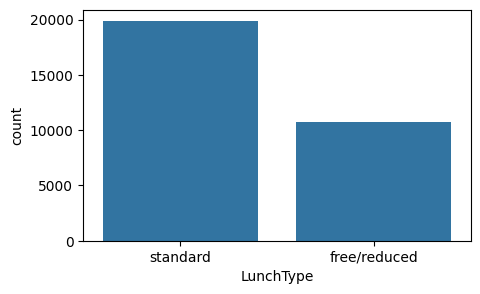

MathScore        ReadingScore        WritingScore       
                   mean median         mean median         mean median
LunchType                                                             
free/reduced  58.862332   59.0    64.189735   64.0    62.650522   63.0
standard      70.709370   71.0    72.175634   73.0    71.529716   72.0

In [26]:
plt.subplots(1,1, figsize=(5,3))

sns.countplot(data=df, x='LunchType')

plt.show()

df.groupby(['LunchType'])[['MathScore','ReadingScore','WritingScore']].agg(['mean','median'])

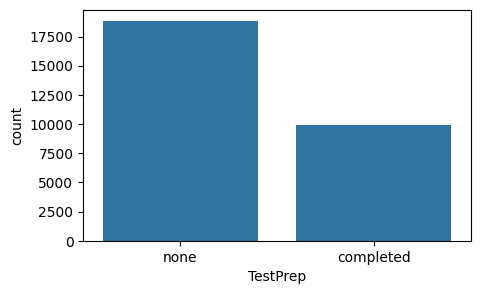

MathScore        ReadingScore        WritingScore       
               mean median         mean median         mean median
TestPrep                                                          
completed  69.54666   70.0    73.732998   74.0    74.703265   75.0
none       64.94877   65.0    67.051071   67.0    65.092756   65.0

In [27]:
plt.subplots(1,1, figsize=(5,3))

sns.countplot(data=df, x='TestPrep')

plt.show()

df.groupby(['TestPrep'])[['MathScore','ReadingScore','WritingScore']].agg(['mean','median'])

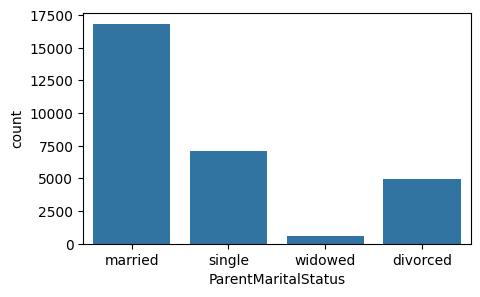

MathScore        ReadingScore        WritingScore       
                          mean median         mean median         mean median
ParentMaritalStatus                                                          
divorced             66.691197   67.0    69.655011   70.0    68.799146   69.0
married              66.657326   67.0    69.389575   70.0    68.420981   69.0
single               66.165704   66.0    69.157250   69.0    68.174440   68.0
widowed              67.368866   68.0    69.651438   70.0    68.563452   69.0

In [28]:
plt.subplots(1,1, figsize=(5,3))

sns.countplot(data=df, x='ParentMaritalStatus')

plt.show()

df.groupby(['ParentMaritalStatus'])[['MathScore','ReadingScore','WritingScore']].agg(['mean','median'])

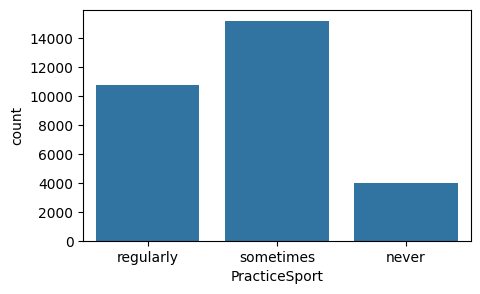

MathScore        ReadingScore        WritingScore       
                    mean median         mean median         mean median
PracticeSport                                                          
never          64.171079   64.0    68.337662   68.0    66.522727   67.0
regularly      67.839155   68.0    69.943019   70.0    69.604003   70.0
sometimes      66.274831   67.0    69.241307   69.0    68.072438   68.0

In [30]:
plt.subplots(1,1, figsize=(5,3))

sns.countplot(data=df, x="PracticeSport")

plt.show()

df.groupby(['PracticeSport'])[['MathScore','ReadingScore','WritingScore']].agg(['mean','median'])

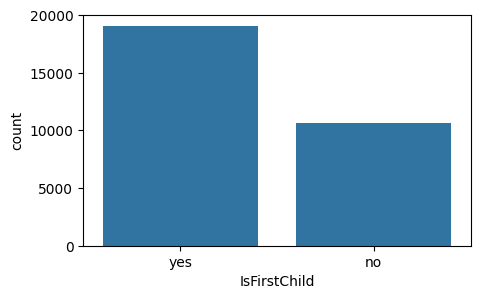

MathScore        ReadingScore        WritingScore       
                   mean median         mean median         mean median
IsFirstChild                                                          
no            66.246832   67.0    69.132614   69.0    68.210887   68.0
yes           66.740646   67.0    69.542553   70.0    68.558484   69.0

In [31]:
plt.subplots(1,1, figsize=(5,3))

sns.countplot(data=df, x="IsFirstChild")

plt.show()

df.groupby(['IsFirstChild'])[['MathScore','ReadingScore','WritingScore']].agg(['mean','median'])

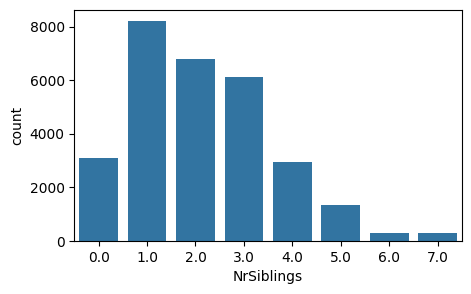

MathScore        ReadingScore        WritingScore       
                 mean median         mean median         mean median
NrSiblings                                                          
0.0         66.819449   67.0    69.547812   70.0    68.746515   69.0
1.0         66.473896   67.0    69.259097   69.0    68.245345   69.0
2.0         66.554934   67.0    69.472018   70.0    68.522533   69.0
3.0         66.719092   67.0    69.488159   70.0    68.650498   69.0
4.0         66.245495   66.0    69.144169   69.0    68.073444   68.0
5.0         66.630303   67.0    69.453788   70.0    68.282576   69.0
6.0         65.917219   65.0    68.801325   69.0    67.860927   68.0
7.0         67.615120   69.0    69.828179   70.0    68.986254   69.0

In [32]:
plt.subplots(1,1, figsize=(5,3))

sns.countplot(data=df, x="NrSiblings")

plt.show()

df.groupby(['NrSiblings'])[['MathScore','ReadingScore','WritingScore']].agg(['mean','median'])

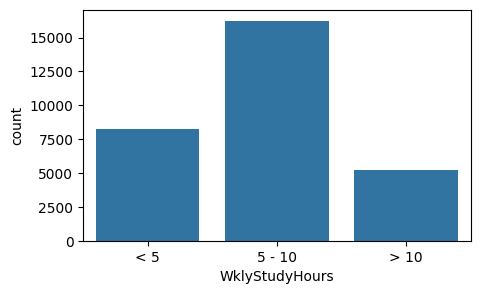

MathScore        ReadingScore        WritingScore       
                     mean median         mean median         mean median
WklyStudyHours                                                          
5 - 10          66.870491   67.0    69.660532   70.0    68.636280   69.0
< 5             64.580359   65.0    68.176135   68.0    67.090192   67.0
> 10            68.696655   70.0    70.365436   71.0    69.777778   70.0

In [33]:
plt.subplots(1,1, figsize=(5,3))

sns.countplot(data=df, x="WklyStudyHours")

plt.show()

df.groupby(['WklyStudyHours'])[['MathScore','ReadingScore','WritingScore']].agg(['mean','median'])